In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/datasets/Iris.csv')
# x = np.array(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
x = np.array(data.iloc[:,1:3])


## Pre-Processing of Y Data

In [23]:
from sklearn import preprocessing
species = data['Species']
LE = preprocessing.LabelEncoder()
LE.fit(species)
y = LE.transform(species)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnbc = GaussianNB()
gnbc.fit(x,y)
ypredict = gnbc.predict(x)

In [25]:
accuracy = (sum(y==ypredict)/len(y))*100.0
print("Accuracy = ",accuracy,"%")

Accuracy =  78.0 %


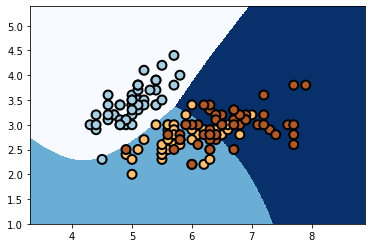

In [34]:
import matplotlib.pyplot as plt
def plot_Graph(gnbc,x,y):
  xmin,xmax = min(x[:,0])-1.0,max(x[:,0])+1.0
  ymin,ymax = min(x[:,1])-1.0,max(x[:,1])+1.0
  xdata,ydata = np.meshgrid(np.arange(xmin,xmax,0.01),np.arange(ymin,ymax,0.01))
  mesh_output = gnbc.predict(np.c_[xdata.ravel(),ydata.ravel()])
  mesh_output = mesh_output.reshape(xdata.shape)
  plt.pcolormesh(xdata,ydata,mesh_output,cmap=plt.cm.Blues)
  plt.scatter(x[:,0],x[:,1],s=80,c=y,linewidths=2,edgecolors='black',cmap=plt.cm.Paired)
plot_Graph(gnbc,x,y)

In [27]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(gnbc,x,y,scoring="accuracy",cv=5)
print('Accuracy : ',round(accuracy.mean() *100.0,2),'%')

precision = cross_val_score(gnbc,x,y,scoring="precision_weighted",cv=5)
print('Precision : ',round(precision.mean() *100.0,2),'%')

recall = cross_val_score(gnbc,x,y,scoring="recall_weighted",cv=5)
print('Recall : ',round(recall.mean() *100.0,2),'%')

f1Score = cross_val_score(gnbc,x,y,scoring="f1_weighted",cv=5)
print('f1 Score : ',round(f1Score.mean() *100.0,2),'%')

Accuracy :  79.33 %
Precision :  80.79 %
Recall :  79.33 %
f1 Score :  79.02 %


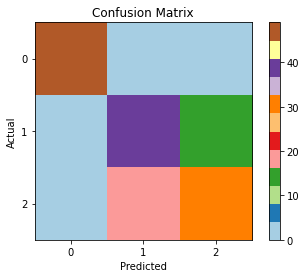

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y,ypredict)

def plot_confusion_matrix(conf_matrix):
  plt.imshow(conf_matrix,interpolation='nearest',cmap= plt.cm.Paired)
  plt.colorbar()
  plt.title("Confusion Matrix")
  plt.xticks(np.arange(3),np.arange(3))
  plt.yticks(np.arange(3),np.arange(3))
  plt.xlabel("Predicted")
  plt.ylabel("Actual")

plot_confusion_matrix(conf_matrix)

In [29]:
from sklearn.metrics import classification_report
names = LE.inverse_transform([0,1,2])
names = names.tolist()
report = classification_report(y,ypredict,target_names=names)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.98      0.99        50
Iris-versicolor       0.65      0.74      0.69        50
 Iris-virginica       0.70      0.62      0.66        50

       accuracy                           0.78       150
      macro avg       0.78      0.78      0.78       150
   weighted avg       0.78      0.78      0.78       150

